In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import geneticXGB #genetic algorithum module
import xgboost as xgb
np.random.seed(723)

In [2]:
# Importing the dataset
dataset = pd.read_csv('../Dataset/data2set.csv' ,header=None)
dataset = dataset.drop([0])
dataset.head()

,0,1,2
1,3,32.5,1.18
2,3,28.7,1.13
3,3,28.5,1.56
4,7,33.5,1.39
5,7,34.9,1.38


In [3]:
X = dataset.iloc[:, :2].values
X =dataset.drop(columns=2)

In [4]:
print(X)

      0      1
1     3   32.5
2     3   28.7
3     3   28.5
4     7   33.5
5     7   34.9
..   ..    ...
710  28  46.85
711  90  60.65
712   7  47.71
713  28  65.37
714  90   73.7

[714 rows x 2 columns]


In [5]:
y = dataset.iloc[:, 2:].values
for i in range(0, len(y)):
    y[i] = float(y[i])
print(y)

[[1.18]
 [1.13]
 [1.56]
 [1.39]
 [1.38]
 [1.42]
 [2.62]
 [3.05]
 [2.31]
 [3.02]
 [3.75]
 [3.01]
 [3.31]
 [3.82]
 [3.43]
 [3.73]
 [3.99]
 [3.68]
 [4.42]
 [4.21]
 [4.48]
 [4.37]
 [4.03]
 [4.41]
 [4.68]
 [4.22]
 [4.42]
 [4.22]
 [3.92]
 [4.12]
 [4.36]
 [4.05]
 [4.23]
 [4.41]
 [4.22]
 [4.32]
 [2.67]
 [2.61]
 [2.71]
 [2.81]
 [3.02]
 [2.95]
 [3.06]
 [3.05]
 [3.01]
 [3.46]
 [3.19]
 [3.37]
 [3.49]
 [3.34]
 [3.43]
 [3.54]
 [3.67]
 [3.56]
 [3.96]
 [3.81]
 [3.76]
 [4.12]
 [3.86]
 [3.78]
 [4.32]
 [4.27]
 [4.48]
 [4.47]
 [4.31]
 [4.52]
 [4.61]
 [4.38]
 [4.48]
 [4.47]
 [4.27]
 [4.69]
 [4.45]
 [4.07]
 [4.29]
 [4.32]
 [4.41]
 [4.31]
 [4.26]
 [4.09]
 [4.24]
 [4.19]
 [4.29]
 [4.25]
 [4.21]
 [4.04]
 [4.35]
 [4.43]
 [4.11]
 [4.3]
 [4.45]
 [4.22]
 [4.35]
 [4.52]
 [4.31]
 [4.41]
 [2.96]
 [2.64]
 [2.39]
 [3.08]
 [3.39]
 [3.11]
 [3.41]
 [3.45]
 [3.45]
 [3.67]
 [3.52]
 [3.75]
 [3.94]
 [3.81]
 [3.79]
 [3.97]
 [4.03]
 [3.99]
 [4.02]
 [4.42]
 [4.35]
 [4.37]
 [4.47]
 [4.03]
 [4.68]
 [4.33]
 [3.99]
 [4.55]
 [4.02]
 

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train = np.round(y_scaler.fit_transform(y_train))
y_test = np.round(y_scaler.fit_transform(y_test))

In [7]:
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [8]:
#XGboost Classifier

#model xgboost
#use xgboost API now
xgDMatrix = xgb.DMatrix(X_train, y_train) #create Dmatrix
xgbDMatrixTest = xgb.DMatrix(X_test, y_test)

In [9]:
'''
Let's find optimized parameters using genetic algorithms
'''

numberOfParents = 80 #number of parents to start
numberOfParentsMating = 40 #number of parents that will mate
numberOfParameters = 7 #number of parameters that will be optimized
numberOfGenerations = 10 #number of genration that will be created

In [10]:
#define the population size

populationSize = (numberOfParents, numberOfParameters)

#initialize the population with randomly generated parameters
population = geneticXGB.initilialize_poplulation(numberOfParents)

#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = geneticXGB.train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F1 score in the this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = geneticXGB.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = geneticXGB.crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = geneticXGB.mutation(children, numberOfParameters)
    
    '''
    We will create new population, which will contain parents that where selected previously based on the
    fitness score and rest of them  will be children
    '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
This is number 0 generation
Best F1 score in the this iteration = 0.972
[2]
This is number 1 generation
Best F1 score in the this iteration = 0.972
[2]
This is number 2 generation
Best F1 score in the this iteration = 0.972
[1]
This is number 3 generation
Best F1 score in the this iteration = 0.972
[2]
This is number 4 generation
Best F1 score in the this iteration = 0.972
[4]
This is number 5 generation
Best F1 score in the this iteration = 0.972
[1]
This is number 6 generation
Best F1 score in the this iteration = 0.972
[2]
This is number 7 generation
Best F1 score in the this iteration = 0.972
[4]
This is number 8 generation
Best F1 score in the this iteration = 0.972
[1]
This is number 9 generation
Best F1 score in the this iteration = 0.972
[3]


In [11]:
#Best solution from the final iteration

fitness = geneticXGB.train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
fitnessHistory[generation+1, :] = fitness

In [12]:
#index of the best solution
bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]
print(fitness)

[0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.9104, 0.9514, 0.9514, 0.972, 0.972, 0.972, 0.972, 0.972, 0.9514, 0.9514, 0.972, 0.972, 0.972, 0.972, 0.9174, 0.972, 0.972, 0.972, 0.972, 0.972, 0.9514, 0.9104, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.9174, 0.9717, 0.972, 0.972, 0.9514, 0.972, 0.9514]


In [13]:
#Best parameters
print("Best parameters are:")
print('learning_rate', population[bestFitnessIndex][0])
print('n_estimators', population[bestFitnessIndex][1])
print('max_depth', int(population[bestFitnessIndex][2])) 
print('min_child_weight', population[bestFitnessIndex][3])
print('gamma', population[bestFitnessIndex][4])
print('subsample', population[bestFitnessIndex][5])
print('colsample_bytree', population[bestFitnessIndex][6])

Best parameters are:
learning_rate 0.88
n_estimators 36.0
max_depth 3
min_child_weight 8.51
gamma 7.61
subsample 0.73
colsample_bytree 0.95


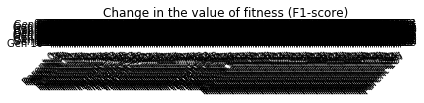

In [14]:
#visualize the change in fitness of the various generations and parents


geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (F1-score)")

In [15]:
#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)

learnigRateHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
nEstimatorHistory = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
maxdepthHistory = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])
minChildWeightHistory = populationHistory[:, 3].reshape([numberOfGenerations+1, numberOfParents])
gammaHistory = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
subsampleHistory = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
colsampleByTreeHistory = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])

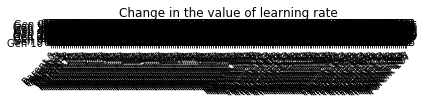

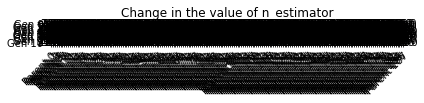

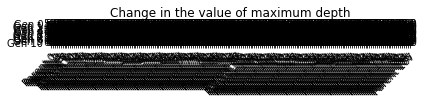

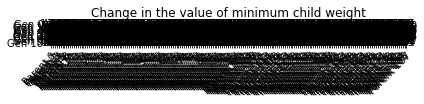

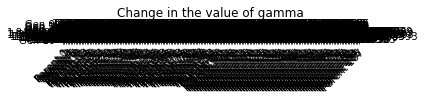

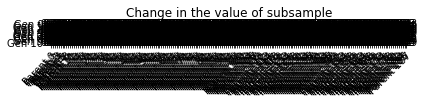

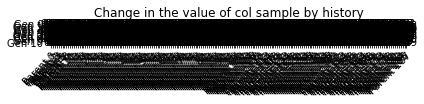

In [16]:
#generate heatmap for each parameter

geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, learnigRateHistory, "learning rate")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, nEstimatorHistory, "n_estimator")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, maxdepthHistory, "maximum depth")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, minChildWeightHistory, "minimum child weight")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, gammaHistory, "gamma")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, subsampleHistory, "subsample")
geneticXGB.plot_parameters(numberOfGenerations, numberOfParents, colsampleByTreeHistory, "col sample by history")